# U.S. Medical Insurance Cost Portfolio Project

## Goals
***
* Analyze multiple variables in meaningful ways that will provide insight into the dataset
* Implement Data Analyst skills in a real-world scenario
* Utilize Python and its various libraries to model this data in a way that is digestible

Each section of this Notebook will contain code that is being used to analyze the dataset, as well as any findings. The aim is to provide both insights into the data while also showcasing coding and data analysis skills.

### Step 1
***
Convert the CSV data into a pandas DataFrame so that the data can be worked with more directly. This is a two dimensional table that assigns a number to each individual in the dataset. Also, create some general functions that will be useful throughout the analysis.

In [88]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

display(HTML('<style>.container {width: 80% !important}</style'))

insurance_df = pd.read_csv('insurance.csv')

/var/folders/kc/5_q13t6j0hg5x5449rgb645r0000gn/T/ipykernel_4383/19917311.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## General Functions and Global Variables
***
The code below will contain some general functions and variables that do things like:
* Defining the total number of people in the dataset
* Finding a proportion of two numbers and returning the proportion of the larger number to the smaller number
    * I may add a way to return the smaller to larger proportion as well, but currently this suits my needs
* Finding a percentage given a number and a total
* Sorting a DataFrame so that it can be plotted easier
    * **Note**: I know there is a built-in pandas function that does this. That function is called within my sort function so that I can help keep all the code more organized and so that I can keep the global namespace cleaner
* Create a DataFrame from a list with a simple function call

I've decided to organize these together so that the code is overall easier to follow and so that all of these less specific functions can be found in a single location.

In [101]:
# Adds an ID column to the dataset
insurance_df['id'] = [i for i in range(len(insurance_df.index))]

# Finds a proportion of two numbers and returns the proportion of the larger value to the smaller value
# this is used i a couple areas so the creation of a global variable seemed appropriate
proportion = lambda x, y: x / y if x > y else y / x

In [102]:
# Prints the average age
print('The average age is: {} years old'.format(round(insurance_df.age.mean(), 1)))
# Prints the average BMI
print('The average BMI is: {}'.format(round(insurance_df.bmi.mean(), 1)))
# Prints the average number of children
print('The average number of children is: {}'.format(round(insurance_df.children.mean(), 1)))
# Prints the average cost of insurance
print('The average insurance cost is: ${}'.format(round(insurance_df.cost.mean(), 2)))

The average age is: 39.2 years old
The average BMI is: 30.7
The average number of children is: 1.1
The average insurance cost is: $13270.42


### Step 2
***
The next step is finding some averages to compare other information to so that there is some kind of baseline. More specific functions will be created for these.

### Step 2.5
***
Find a way to represent the non-numerical values in a numeric way to see if there is any interesting information or data bias that could be revealed. Functions will be written for these unqiue values as well.

      sex  count
0  female    662
1    male    676
The proportion of males to females is 1.02:1, respectively.


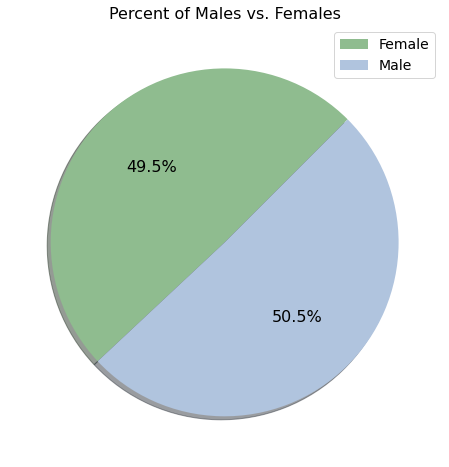

In [103]:
# Creates a DataFrame of sex and ID
sex_df = insurance_df[['sex', 'id']]
# Counts the number of people of each sex
sex_df = sex_df.groupby(['sex']).id.count().reset_index()
# Renames the count of ID's to count
sex_df.rename(columns = {'id': 'count'}, inplace = True)
print(sex_df)

# Find the proportion of males to females
print('The proportion of males to females is {}:1, respectively.'.format(round(proportion(sex_df['count'][0], sex_df['count'][1]), 2)))

sex_df.plot.pie(y = 'count',
                ylabel = '',
                labeldistance = None,
                figsize = (8, 8),
                title = 'Percent of Males vs. Females',
                colors = ['darkseagreen', 'lightsteelblue'],
                autopct = '%1.1f%%',
                fontsize = 16,
                legend = True,
                shadow = True,
                startangle = 45)
plt.legend(['Female', 'Male'], prop={'size': 14})
plt.title('Percent of Males vs. Females', fontdict = {'fontsize': 16})
plt.show()



What the above code tells us is that the data set is pretty evenly split bewteen males and females, so there is little sex based bias in the data. Now what about number of smokers?

  smoker  count
0     no   1064
1    yes    274
The proportion of non-smokers to smokers is 3.88:1, respectively.


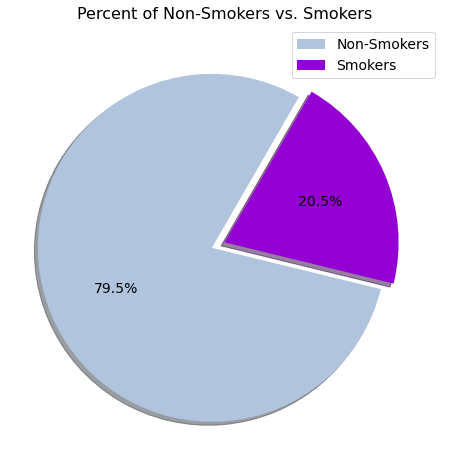

In [104]:
# Creates a DataFrame of smoker status and ID
smoker_df = insurance_df[['smoker', 'id']]
# Groups the DataFrame by smoker status and counts the number of patients for eacg status
smoker_df = smoker_df.groupby('smoker').id.count().reset_index()
# Renames the ID to count
smoker_df.rename(columns = {'id': 'count'}, inplace = True)
print(smoker_df)

# Find the proportion of total smokers to non-smokers
print('The proportion of non-smokers to smokers is {}:1, respectively.'.format(round(proportion(smoker_df['count'][0], smoker_df['count'][1]), 2)))

smoker_df.plot.pie(y = 'count',
                   ylabel = '',
                   labeldistance = None,
                   title = 'Percent of Non-Smokers and Smokers',
                   figsize = (8, 8),
                   colors = ['lightsteelblue', 'darkviolet'],
                   fontsize = 14,
                   autopct = '%1.1f%%',
                   legend = True,
                   shadow = True,
                   explode = (0.08, 0),
                   startangle = 60)
plt.legend(['Non-Smokers', 'Smokers'], prop={'size': 14})
plt.title('Percent of Non-Smokers vs. Smokers', fontdict = {'fontsize': 16})
plt.show()



These conclusion find that non-smokers in this dataset outnumber smokers almost 4 to 1. This could skew some of the average data that was found in a couple ways:
1. The average cost could be skewed lower because of the lower cost that is assumed to be associated with non-smoking.
2. Average BMI could be skewed slightly higher because the weight of smokers tends to be lower than non-smokers due to the metabolic effect of nicotine (Williams, Why smokers are skinny | science | AAAS 2011).
I'll dive into this later on, but for now, just keep it in mind.

Next I want to find which region is the most prevalent in the dataset.

      region  count
0  northeast    324
1  northwest    325
2  southeast    364
3  southwest    325


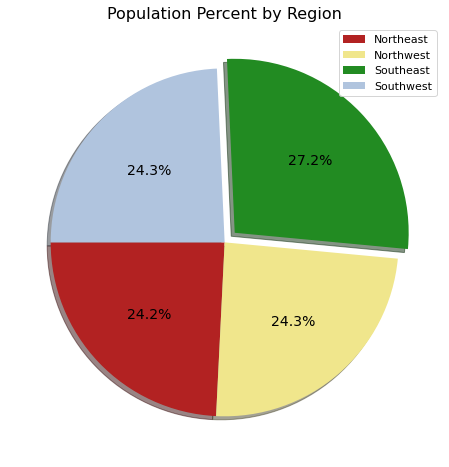

In [105]:
# Creates DataFrame of regions and ID
regions_df = insurance_df[['region', 'id']]
# Counts number of people in each region
regions_df = regions_df.groupby('region').id.count().reset_index()
# Changes ID count to count
regions_df.rename(columns = {'id': 'count'}, inplace = True)
print(regions_df)
regions_df.plot.pie(y = 'count',
                    ylabel = '',
                    labeldistance = None,
                    title = 'Population Percent by Region',
                    figsize = (8, 8),
                    autopct = '%1.1f%%',
                    fontsize = 14,
                    colors = ['firebrick', 'khaki', 'forestgreen', 'lightsteelblue'],
                    legend = True,
                    shadow = True,
                    explode = (0, 0, 0.08, 0),
                    startangle = 180)
plt.legend(['Northeast', 'Northwest', 'Southeast', 'Southwest'], prop={'size': 11})
plt.title('Population Percent by Region', fontdict = {'fontsize': 16})
plt.show()


This finds that the data is pretty evenly distributed among the four regions with the Southeast having a slightly higher representation. Overall, it shouldn't affect the data too much but further analysis will need to be done to determine that.

### Step 3
***
Do more in-depth analysis now that we have some basic totals, averages, percentages, and proportions.

The analyses that will be done will consist of:
* Average age of people with children
* Average age of people who smoke
* Number of smokers who are male vs. female
* Average cost for smokers vs. non-smokers
    * First find the average cost for males and females
* Average BMI of people who smoke
* The average age and BMI in each region
***
These analyses should provide some more interesting information about the dataset as a whole. The conclusions as a whole will be discussed in a section below.


First, the average age of people with children.

In [106]:
# Create a DataFrame of people with children
children_df = insurance_df[insurance_df['children'] > 0]

# Prints the average age of those who have children and the differnce from the overall average
print('The average age of people who have children is {0} years old, which is {1} years older than the total average.'
      .format(round(children_df.age.mean(), 1), abs(round(children_df.age.mean() - insurance_df.age.mean(), 1))))


The average age of people who have children is 39.8 years old, which is 0.6 years older than the total average.


The average age of those who have children is very, very close to the overall average age. This makes sense because the average number of children was found to be a little over 1 per person on average, meaning the majority of people in the dataset have at least one child.

Next, the average age of smokers.

In [107]:
# Creates DataFrames for both smokers and non-smokers
smoker_df = insurance_df[insurance_df['smoker'] == 'yes']
non_smoker_df = insurance_df[insurance_df['smoker'] == 'no']

# Prints the average age of those who smoke and the difference from the overall average
print('The average age of people who smoke is {0} years old, which is {1} years younger than the total average.'
      .format(round(smoker_df.age.mean(), 1), abs(round(smoker_df.age.mean() - insurance_df.age.mean(), 1))))

# Prints the average age of people who do not smoke and the difference from the overall average
print('The average age of people who do not smoke is {0} years old, which is {1} years older than the total average.'
      .format(round(non_smoker_df.age.mean(), 1), abs(round(non_smoker_df.age.mean() - insurance_df.age.mean(), 1))))

# Prints the difference in age between those who smoke and those who do not
print('The difference between the average age of those who smoke and those who do not is {} years.'
      .format(abs(round(smoker_df.age.mean() - non_smoker_df.age.mean(), 1))))


The average age of people who smoke is 38.5 years old, which is 0.7 years younger than the total average.
The average age of people who do not smoke is 39.4 years old, which is 0.2 years older than the total average.
The difference between the average age of those who smoke and those who do not is 0.9 years.


Interestingly, the age of both those who smoke and do not smoke is very close to the overall average. The difference between the averages is also very small. This is particularly surprising because only 20.5% of the dataset reports being a smoker which means there must not be a lot of age difference among smokers.

For further smoker analysis, this next section will look at the number of male vs. female smokers.

The proportion of males who smoke to females who smoke is 1.4:1, respectively.


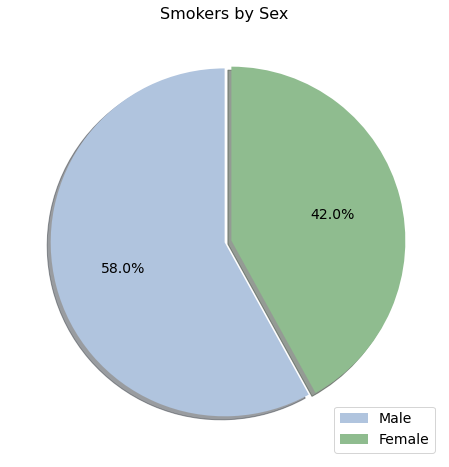

In [108]:
# Creates DataFrames from the DataFrames of smokers based on sex
male_smoker_df = smoker_df[smoker_df['sex'] == 'male']
female_smoker_df = smoker_df[smoker_df['sex'] == 'female']

# Print the proportion of males who smoke to females who smoke
print('The proportion of males who smoke to females who smoke is {}:1, respectively.'
      .format(round(proportion(male_smoker_df.id.count(), female_smoker_df.id.count()), 1)))

# Creates a DataFrame to plot the totals for males and females who smoke
smokers_and_sex_df = pd.DataFrame({'Male/Female Smoker Totals': [male_smoker_df.id.count(), female_smoker_df.id.count()]}, index = ['Male', 'Female'])

# Plots the data on a pie chart
smokers_and_sex_df.plot.pie(y = 'Male/Female Smoker Totals',
                            ylabel = '',
                            labeldistance = None,
                            title = 'Smokers by Sex',
                            figsize = (8, 8),
                            autopct = '%1.1f%%',
                            fontsize = 14,
                            legend = True,
                            shadow = True,
                            colors = ['lightsteelblue', 'darkseagreen'],
                            explode = (0, 0.04),
                           startangle = 90)
plt.legend(['Male', 'Female'], prop={'size': 14})
plt.title('Smokers by Sex', fontdict = {'fontsize': 16})
plt.show()

The number of males who smoke is 16% higher than females who smoke, as seen in the graph above. We could infer that this would likely mean that the average cost of insurance for males is higher than females, given that the cost for smokers is likely higher than non-smokers. This hypothesis will be analyzed next.

In [109]:
# Create two new DataFrames seperated by sex
male_df = insurance_df[insurance_df['sex'] == 'male']
female_df = insurance_df[insurance_df['sex'] == 'female']

# Find the average cost of insurance for males and females
print('The average insurance cost for all males is ${male}, while the average for all females is ${female}. This is a difference of ${diff}'
      .format(male = round(male_df.cost.mean(), 2),
              female = round(female_df.cost.mean(), 2),
              diff = round(male_df.cost.mean() - female_df.cost.mean(), 2)))

# Print the average smoker cost, non-smoker cost, and a comparison
print('The average insurance cost for all smokers is ${smoker}, the average cost for all non-smokers is ${non_smoker}, and the difference between them is ${diff}'
      .format(smoker = round(smoker_df.cost.mean(), 2),
              non_smoker = round(non_smoker_df.cost.mean(), 2), 
              diff = round(smoker_df.cost.mean() - non_smoker_df.cost.mean(), 2)))
print('The average insurance cost for all smokers is ${diff1} higher than the average for all people in the dataset, and the average cost for non-smokers is ${diff2} lower than the average for all people in the dataset.'
      .format(diff1 = round(smoker_df.cost.mean() - insurance_df.cost.mean(), 2), 
              diff2 = round(insurance_df.cost.mean() - non_smoker_df.cost.mean(), 2)))

# Print the average male smoker cost, average female smoker cost, average male non-smoker cost, average female non-smoker cost, and some comparisons
print('The average insurance cost for male smokers is ${male}, while the average for female smokers is ${female}. The difference between them is ${diff}'
      .format(male = round(male_smoker_df.cost.mean(), 2), 
              female = round(female_smoker_df.cost.mean(), 2),
              diff = round(male_smoker_df.cost.mean() - female_smoker_df.cost.mean(), 2)))

# Create two new DataFrames for non-smokers sperated by sex
male_non_smoker_df = male_df[male_df['smoker'] == 'no']
female_non_smoker_df = female_df[female_df['smoker'] == 'no']

print('The average insurance cost for male non-smokers is ${male}, while the average for female non-smokers is ${female}. The difference between them is ${diff}'
      .format(male = round(male_non_smoker_df.cost.mean(), 2), 
              female = round(female_non_smoker_df.cost.mean(), 2),
              diff = round(female_non_smoker_df.cost.mean() - male_non_smoker_df.cost.mean(), 2)))
print('The difference in average insurance cost between male smokers and male non-smokers is ${male_diff}, and the difference between female smokers and female non-smokers is ${female_diff}'
      .format(male_diff = round(male_smoker_df.cost.mean() - male_non_smoker_df.cost.mean(), 2),
              female_diff = round(female_smoker_df.cost.mean() - female_non_smoker_df.cost.mean(), 2)))


The average insurance cost for all males is $13956.75, while the average for all females is $12569.58. This is a difference of $1387.17
The average insurance cost for all smokers is $32050.23, the average cost for all non-smokers is $8434.27, and the difference between them is $23615.96
The average insurance cost for all smokers is $18779.81 higher than the average for all people in the dataset, and the average cost for non-smokers is $4836.15 lower than the average for all people in the dataset.
The average insurance cost for male smokers is $33042.01, while the average for female smokers is $30679.0. The difference between them is $2363.01
The average insurance cost for male non-smokers is $8087.2, while the average for female non-smokers is $8762.3. The difference between them is $675.09
The difference in average insurance cost between male smokers and male non-smokers is $24954.8, and the difference between female smokers and female non-smokers is $21916.7


There are some interesting conclusions that can be drawn from the above analysis:
***
First, the hypothesis that overall average male insurance costs are  greater than overall average female insurance costs due to there being more male smokers was *likely* correct. This will be proven further in the other points below.
***
Second, the cost for insurance increases **greatly** for smokers. This means that the general average cost is skewed by the cost for smokers, despite the fact that smokers only make up 20.5% of the total dataset. In general, this means that the average cost for the whole dataset isn't particularly useful because it's not very representative of the dataset as a whole.
***
Finally, the average cost for male smokers is higher than that of female smokers. Interestingly, though, the average for male non-smokers is **lower** than female non-smokers. This is interesting because:
1. It further proves the hypothesis from the first point. When we only look at non-smokers, males pay less on average for insurance.
2. It raises further questions as to why female average insurance costs would be higher? One possible reason is that, in general, women are more likely to go to the doctor for illness, annual exams, etc. (NCHS pressroom - 2001 news release - women visit doctor more often than men 2006)


This next section will look at the relationship between BMI and smoking status.

In [110]:
# Print average BMI for male smokers and non-smokers, and female smokers and non-smokers
print('The average BMI for male smokers is {smoker} and for male non-smokers it is {non_smoker}. This is a difference of {diff}'
      .format(smoker = round(male_smoker_df.bmi.mean(), 2), 
              non_smoker = round(male_non_smoker_df.bmi.mean(), 2),
              diff = round(male_smoker_df.bmi.mean() - male_non_smoker_df.bmi.mean(), 2)))

print('The average BMI for female smokers is {smoker} and for female non-smokers it is {non_smoker}. This is a difference of {diff}'
      .format(smoker = round(female_smoker_df.bmi.mean(), 2), 
              non_smoker = round(female_non_smoker_df.bmi.mean(), 2),
              diff = abs(round(female_smoker_df.bmi.mean() - female_non_smoker_df.bmi.mean(), 2))))

The average BMI for male smokers is 31.5 and for male non-smokers it is 30.77. This is a difference of 0.73
The average BMI for female smokers is 29.61 and for female non-smokers it is 30.54. This is a difference of 0.93


Contrary to the article cited above (citation number 1), smoker BMI isn't significantly lower than non-smoker BMI as previosuly thought. For males, smoker BMI is actually higher than non-smoker BMI. For females, smoker BMI is lower than non-smoker BMI, but by less than 1 point.

Lastly, this section will look at the relationship between average age and BMI between regions.

In [111]:
# Create DataFrames for each region
NE_df = insurance_df[insurance_df['region'] == 'northeast']
NW_df = insurance_df[insurance_df['region'] == 'northwest']
SE_df = insurance_df[insurance_df['region'] == 'southeast']
SW_df = insurance_df[insurance_df['region'] == 'southwest']

# Print average BMI and age for each region

# Northeast
print('The average age in the Northeast is {age} years old and the average BMI is {bmi}'
      .format(age = round(NE_df.age.mean(), 2),
              bmi = round(NE_df.bmi.mean(), 2)))

# Northwest
print('The average age in the Northwest is {age} years old and the average BMI is {bmi}'
      .format(age = round(NW_df.age.mean(), 2),
              bmi = round(NW_df.bmi.mean(), 2)))

# Southeast
print('The average age in the Southeast is {age} years old and the average BMI is {bmi}'
      .format(age = round(SE_df.age.mean(), 2),
              bmi = round(SE_df.bmi.mean(), 2)))

# Southwest
print('The average age in the Southwest is {age} years old and the average BMI is {bmi}'
      .format(age = round(SW_df.age.mean(), 2),
              bmi = round(SW_df.bmi.mean(), 2)))


The average age in the Northeast is 39.27 years old and the average BMI is 29.17
The average age in the Northwest is 39.2 years old and the average BMI is 29.2
The average age in the Southeast is 38.94 years old and the average BMI is 33.36
The average age in the Southwest is 39.46 years old and the average BMI is 30.6


The average age among regions is nearly identical, with the largest difference being 0.52 years between the Southwest and Southeast. A difference of a little over 6 months is likely not statistically significant. 
Average BMI is a little more interesting. Though at first glance, it doesn't seem to vary too much, a 4 point difference is actually fairly high. The Southeast region had the highest BMI. BMI and poverty are closely related (Lee, Why poverty leads to obesity and life-long problems 2012) and poverty rates in the US tend to be higher in Southeast states. This is a great example of an interesting hypothesis that can be created by simply looking at different subsets of data.

## Conclusions
***
By working with this dataset in various ways, we've come across some interesting conclusions:
* The number of male smokers is greater than the number of female smokers.
* The average insurance cost for all males is higher than all females, but further analysis showed that male costs were skewed by smoking status more than female costs.
* The average insurance cost for non-smoking males was lower than non-smoking females.
* There is not a statistically significant difference between the average age in the four regions.
* The Southeast region has a significantly higher average BMI than the other regions.
***
## Future Directions
***
Some interesting questions to look into in the future might be:
* Why are female non-smoking insurance costs higher?
* Is the reason for the Southeast region having higher BMI due to poverty?
* Are people who have/do not have children less/more likely to be smokers?

## Citations
1. Williams, S. C. P. (2011, June 9). Why smokers are skinny | science | AAAS. Why Smokers Are Skinny. Retrieved July 20, 2022, from https://www.science.org/content/article/why-smokers-are-skinny 
2. Centers for Disease Control and Prevention. (2006, October 6). NCHS pressroom - 2001 news release - women visit doctor more often than men. Centers for Disease Control and Prevention. Retrieved July 20, 2022, from https://www.cdc.gov/nchs/pressroom/01news/newstudy.htm#:~:text=Women%20more%20likely%20than%20men,likely%20to%20have%20annual%20exams&amp;text=A%20new%20report%20from%20the,their%20care%20differs%20from%20men.
3. Lee, H. (2012, December 1). Why poverty leads to obesity and life-long problems. Scholars Strategy Network. Retrieved July 21, 2022, from https://scholars.org/contribution/why-poverty-leads-obesity-and-life-long-problems